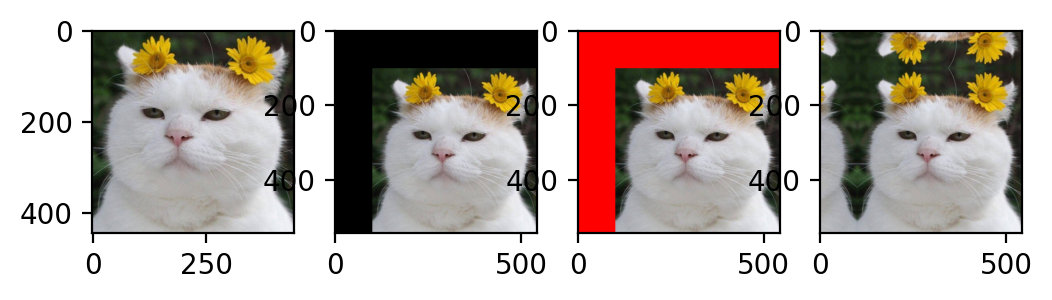

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/cat-01.jpg')
img = img[...,::-1] # cv2.cvtColor()
rows, cols = img.shape[:2]

dx = 100
dy = 100

matrix = np.float32([
    [1, 0, dx],
    [0, 1, dy],
])

dst1 = cv2.warpAffine(img, matrix, (cols + dx, rows + dy))
dst2 = cv2.warpAffine(img, matrix, (cols + dx, rows + dy),
                      None, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255, 0 , 0))
dst3 = cv2.warpAffine(img, matrix, (cols + dx, rows + dy), None, cv2.INTER_LINEAR, cv2.BORDER_REFLECT)

fig, axes = plt.subplots(ncols=4, dpi=200)
axes[0].imshow(img)
axes[1].imshow(dst1)
axes[2].imshow(dst2)
axes[3].imshow(dst3)

plt.show()

In [8]:
#보관하는 방법
-> 어떻게 하면 비어있는 값들을 채워 넣어줄건가
-> 1D, 2D, 3D 보관방법 똑같음
=>super resolution라고 함

In [9]:
#확대 축소
img = cv2.imread('./images/cat-01.jpg')

img = img[...,::-1] # cv2.cvtColor()
rows, cols = img.shape[:2]
img = cv2.resize(img, (int(cols*0.5), int(rows*0.5)))
print(
    
dx = 100
dy = 100

small = np.float32([
    [0.5, 0, 0], # 고양이 축소
    [0.5, 1, 0], #이동안할거라 0으로 주기
])

large = np.array([
    [2, 0, 0],
    [0, 2, 0]
], dytype=np.float32)

dst1 = cv2.warpAffine(img, small, (int(cols*0.5), int(rows*0.5)))
dst2 = cv2.warpAffine(img, large, (int(cols*2), int(rows*2)))
dst3 = cv2.warpAffine(img, large, (int(cols*2), int(rows*2)))


fig, axes = plt.subplots(ncols=4, dpi=200)
axes[0].imshow(img)
axes[1].imshow(dst1)
axes[2].imshow(dst2)
axes[3].imshow(dst3)
fig.tight_layout()
plt.show()
    
    


TypeError: 'dytype' is an invalid keyword argument for array()

(443, 444, 3)


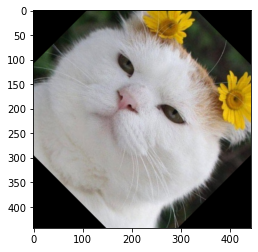

In [13]:
#이동

img = cv2.imread('./images/cat-01.jpg')
print(img.shape)
img = img[...,::-1]
h, w = img.shape[:2]

d45 = 45.0*np.pi/180
d90 = 90.0*np.pi/180

m45 = np.array([
    [np.cos(d45), -1*np.sin(d45), h//2],
    [np.sin(d45), np.cos(d45), -1* w//4],
])

r45 = cv2.warpAffine(img, m45, (w,h))

plt.imshow(r45)
plt.show()

(443, 444, 3)
0.7853981633974483 1.5707963267948966


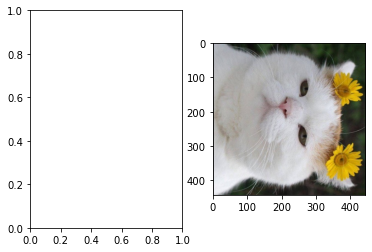

In [16]:
#이동 90도

img = cv2.imread('./images/cat-01.jpg')
print(img.shape)
img = img[...,::-1]
h, w = img.shape[:2]

d45 = 45.0*np.pi/180
d90 = 90.0*np.pi/180
print(d45, d90)

m45 = np.array([
    [np.cos(d45), -1*np.sin(d45), h//2],
    [np.sin(d45), np.cos(d45), -1* w//4],
])

m90 = np.array([
    [np.cos(d90), -1*np.sin(d90), h],
    [np.sin(d90), np.cos(d90), 0],
])


r45 = cv2.warpAffine(img, m45, (w,h))
r90 = cv2.warpAffine(img, m90, (h,w))

fig, axes = plt.subplots(ncols=2)

plt.imshow(r45)
plt.imshow(r90)

plt.show()

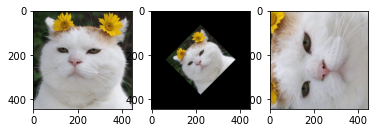

In [18]:
import cv2

img = cv2.imread('./images/cat-01.jpg')
img = img[...,::-1]
rows, cols = img.shape[0:2]

m45 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.5) 
m90 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1.5) 
# m90 = np.rot90()

img45 = cv2.warpAffine(img, m45, (cols, rows))
img90 = cv2.warpAffine(img, m90, (cols, rows))


fig, axes = plt.subplots(ncols=3)
axes[0].imshow(img)
axes[1].imshow(img45)
axes[2].imshow(img90)
plt.show()